03-`ann`
==============

- `ann` provides access to ***approximate nearest neighbor*** search routines. 
- It is called by `yai` and `newtargets`.


In [1]:
install.packages("yaImpute")
library(yaImpute)

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


### Make up some data

In [2]:
## Make a couple of bivariate normal classes
rmvn <- function(n, mu=0, V = matrix(1))
{
p <- length(mu)
if(any(is.na(match(dim(V),p))))
stop("Dimension problem!")
D <- chol(V)
matrix(rnorm(n*p), ncol=p) %*% D + rep(mu,rep(n,p))
}
m <- 10000

In [3]:
    
## Class 1.
mu.1 <- c(20, 40)
V.1 <- matrix(c(-5,1,0,5),2,2); V.1 <- V.1%*%t(V.1)
c.1 <- cbind(rmvn(m, mu.1, V.1), rep(1, m))
head(c.1)

18.75396,43.15096,1
18.14892,33.00549,1
15.78051,39.45869,1
23.76494,37.93533,1
18.28491,45.21898,1
21.48793,29.87055,1


In [4]:
## Class 2.
mu.2 <- c(30, 60)
V.2 <- matrix(c(4,2,0,2),2,2); V.2 <- V.2%*%t(V.2)
c.2 <- cbind(rmvn(m, mu.2, V.2), rep(2, m))
head(c.2)

27.60780,62.12986,2
31.77077,62.73433,2
25.80204,59.52936,2
26.33747,57.14842,2
29.39358,59.76053,2
32.99930,61.94057,2


In [5]:
## Class 3.
mu.3 <- c(15, 60)
V.3 <- matrix(c(5,5,0,5),2,2); V.3 <- V.3%*%t(V.3)
c.3 <- cbind(rmvn(m, mu.3, V.3), rep(3, m))
head(c.3)

11.01655,52.86288,3
21.16122,66.93488,3
19.42657,57.76761,3
22.64572,65.96229,3
19.00535,64.11244,3
15.80381,66.02088,3


In [14]:
c.all <- rbind(c.1, c.2, c.3)
dim(c.all)

[1] 30000     3

In [6]:

max.x <- max(c.all[,1]); min.x <- min(c.all[,1])
max.y <- max(c.all[,2]); min.y <- min(c.all[,2])

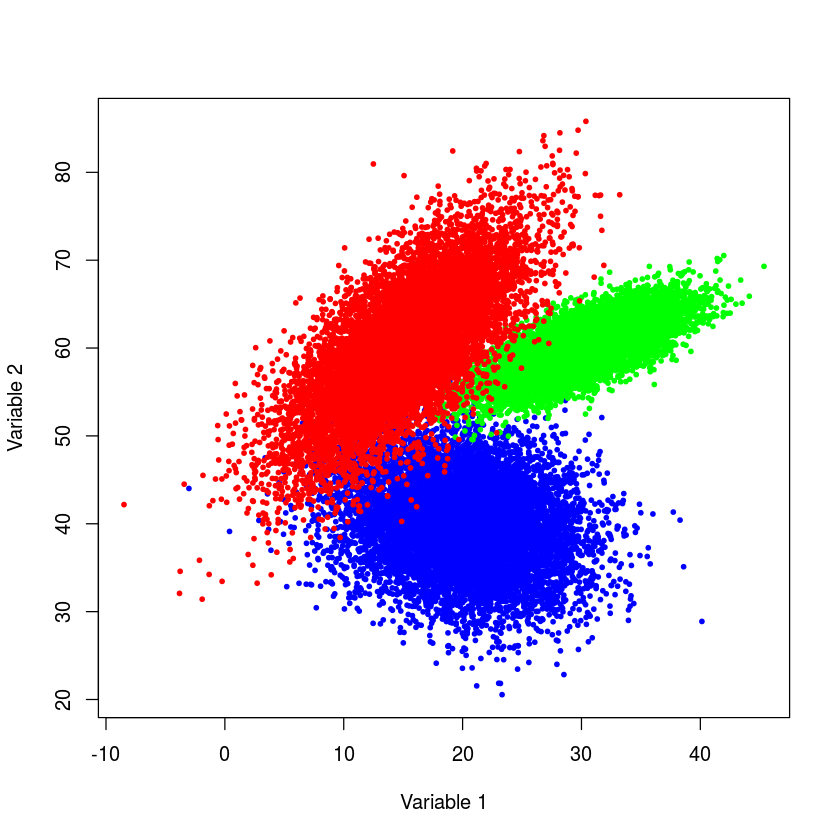

In [7]:
## Check them out.
plot(c.1[,1], c.1[,2], xlim=c(min.x, max.x), ylim=c(min.y, max.y),
pch=19, cex=0.5,
col="blue", xlab="Variable 1", ylab="Variable 2")
points(c.2[,1], c.2[,2], pch=19, cex=0.5, col="green")
points(c.3[,1], c.3[,2], pch=19, cex=0.5, col="red")

In [8]:
## Take a reference sample.
n <- 2000
ref <- c.all[sample(1:nrow(c.all), n),]
head(ref,4)

28.97699,56.54787,2
18.03967,66.38122,3
14.69753,58.70281,3
16.08557,63.63340,3


In [9]:
head(c.all[,1:2],3)

18.75396,43.15096
18.14892,33.00549
15.78051,39.45869


In [10]:
## Compare search times
k <- 10

## Do a simple brute force search.
brute <- ann(ref=ref[,1:2], target=c.all[,1:2],
            tree.type="brute", k=k, verbose=FALSE)

print(brute$searchTime)


[1] 0.438097


In [16]:
class(brute)

[1] "ann"

In [17]:
names(brute)

[1] "knnIndexDist" "searchTime"   "k"            "tree.type"

In [11]:
## Do an exact kd-tree search.
kd.exact <- ann(ref=ref[,1:2], target=c.all[,1:2],
tree.type="kd", k=k, verbose=FALSE)
print(kd.exact$searchTime)

[1] 0.068927


In [12]:

## Do an approximate kd-tree search.
kd.approx <- ann(ref=ref[,1:2], target=c.all[,1:2],
tree.type="kd", k=k, eps=100, verbose=FALSE)
print(kd.approx$searchTime)


[1] 0.025062


In [13]:
## Takes too long to calculate for this many targets.
## Compare overall accuracy of the exact vs. approximate search
knn.mode <- function(knn.indx, ref){
 x <- ref[knn.indx,]
 as.numeric(names(sort(as.matrix(table(x))[,1],
 decreasing=TRUE))[1])
}